4. Accident Severity and Outcomes


In [63]:
import dask.dataframe as dd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import gc



•	What is the distribution of accidents by severity levels (minor, moderate, severe, fatal)?


Severity
3    1299337
1      67366
2    6156981
4     204710
Name: count, dtype: int64
7728394


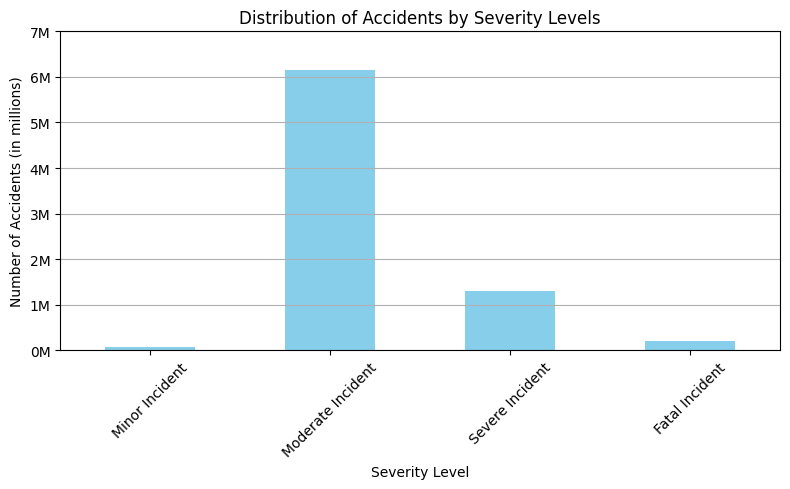

In [64]:
# Group by severity level

# Load the dataset
df = dd.read_parquet('/Users/er/Desktop/Data Analysis/Projects/Python/US Accidents/USTrafficAccidents/Data/Parquet/US_Accidents_March23.parquet')  

severity_counts = df['Severity'].value_counts().compute()
total_severity = severity_counts.sum()

print(severity_counts)
print(total_severity)

# Get the counts of each severity level
severity_counts = df['Severity'].value_counts().compute()

# Map severity numbers to descriptive names
severity_labels = {
    1: 'Minor Incident',
    2: 'Moderate Incident',
    3: 'Severe Incident',
    4: 'Fatal Incident',
}

# Update index to descriptive names
severity_counts.index = severity_counts.index.map(severity_labels)

# Create a categorical index with the specified order
ordered_severity = ['Minor Incident', 'Moderate Incident', 'Severe Incident', 'Fatal Incident']
severity_counts = severity_counts.reindex(ordered_severity)

# Adjust the scale (convert counts to millions)
severity_counts_millions = severity_counts / 1_000_000

# Plot the distribution
plt.figure(figsize=(8, 5))
severity_counts_millions.plot(kind='bar', color='skyblue')
plt.title('Distribution of Accidents by Severity Levels')
plt.xlabel('Severity Level')
plt.ylabel('Number of Accidents (in millions)')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Set y-ticks for better readability
plt.yticks([i for i in range(0, int(severity_counts_millions.max()) + 2)], 
           [f'{i}M' for i in range(0, int(severity_counts_millions.max()) + 2)])

# Show the plot
plt.tight_layout()
plt.show()


•	What factors (e.g., weather, road conditions, time of day) seem to correlate with higher accident severity?

Correlation Matrix for Severity Level 1:
                   Severity  Temperature(F)  Humidity(%)  Wind_Speed(mph)  \
Severity                NaN             NaN          NaN              NaN   
Temperature(F)          NaN        1.000000    -0.288157        -0.031746   
Humidity(%)             NaN       -0.288157     1.000000        -0.205287   
Wind_Speed(mph)         NaN       -0.031746    -0.205287         1.000000   
Precipitation(in)       NaN       -0.000622     0.081820         0.026067   
Distance(mi)            NaN       -0.025354     0.012569         0.036061   
Traffic_Signal          NaN        0.029288    -0.044182         0.018568   

                   Precipitation(in)  Distance(mi)  Traffic_Signal  
Severity                         NaN           NaN             NaN  
Temperature(F)             -0.000622     -0.025354        0.029288  
Humidity(%)                 0.081820      0.012569       -0.044182  
Wind_Speed(mph)             0.026067      0.036061        0.018568

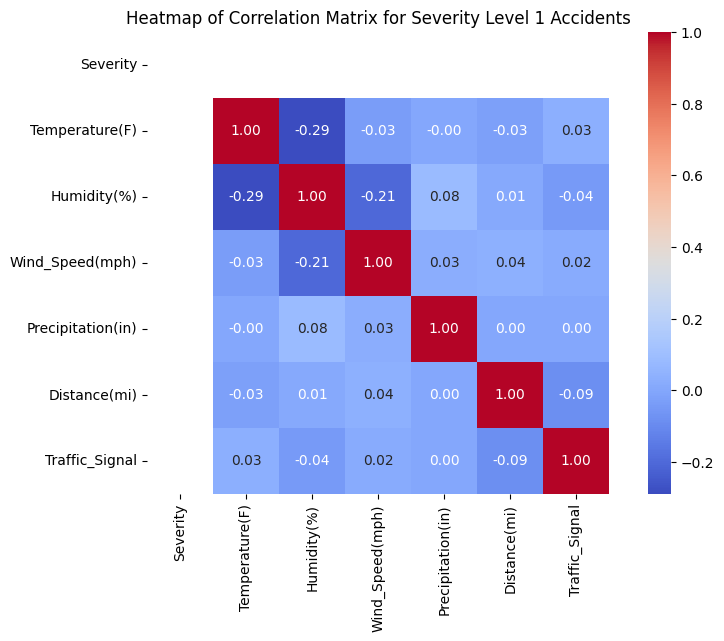

        Severity  Temperature(F)  Humidity(%)  Wind_Speed(mph)  \
14035          4            63.0         70.0             13.8   
58391          4            59.0         93.0              5.8   
133648         4            89.1         63.0             12.7   
135764         4            75.0         94.0             17.3   
140384         4            80.1         85.0             10.4   

        Precipitation(in)  Distance(mi)  Traffic_Signal  
14035                0.00          0.01           False  
58391                0.01          0.01           False  
133648               0.00          0.00           False  
135764               0.27          0.00           False  
140384               0.00          0.00           False  
Number of rows with Severity level 1: 132126


In [68]:
import dask.dataframe as dd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = dd.read_parquet('/Users/er/Desktop/Data Analysis/Projects/Python/US Accidents/USTrafficAccidents/Data/Parquet/US_Accidents_March23.parquet')

# Select relevant columns for analysis
columns_of_interest = [
    'Severity', 
    'Temperature(F)', 
    'Humidity(%)', 
    'Wind_Speed(mph)', 
    'Precipitation(in)', 
    'Distance(mi)',         
    'Traffic_Signal',        
]

# Filter the DataFrame to include only relevant columns
df_filtered = df[columns_of_interest]

# Drop rows with NaN values in the selected columns
df_filtered = df_filtered.dropna()

# Filter the DataFrame to include only rows where Severity equals 1
df_severity_1 = df_filtered[df_filtered['Severity'] == 4]

# Compute the filtered Dask DataFrame to convert it to a Pandas DataFrame
df_severity_1 = df_severity_1.compute()

# Calculate the correlation matrix for the filtered DataFrame
correlation_matrix = df_severity_1.corr()

# Print the correlation matrix
print("Correlation Matrix for Severity Level 1:")
print(correlation_matrix)

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True)
plt.title('Heatmap of Correlation Matrix for Severity Level 1 Accidents')
plt.show()

# Print the first few rows (now a Pandas DataFrame)
print(df_severity_1.head())

# Print the number of rows in the filtered DataFrame for Severity 1
print(f"Number of rows with Severity level 1: {df_severity_1.shape[0]}")

The analysis of the correlation matrix for severity level 1 accidents reveals several key insights regarding weather conditions and accident characteristics. A moderate negative correlation of -0.29 between temperature and humidity suggests that higher temperatures are generally associated with lower humidity. Additionally, a weak negative correlation of -0.21 exists between humidity and wind speed, indicating that increased humidity may correspond to decreased wind speeds. Other relationships, such as between distance and severity (0.04) or traffic signals and severity (0.03), show negligible correlations, implying minimal impact on accident severity. Overall, while some weak correlations among weather variables exist, their direct influence on the severity of level 1 accidents appears limited, necessitating further investigation into more severe accident levels and additional factors.